# Import Libraries

In [1]:
import pandas as pd

# Set the local path to access data set

In [2]:
cd C:/Users/DELL/Desktop/Datasets

C:\Users\DELL\Desktop\Datasets


# Load the dataset

In [3]:
iris = pd.read_csv('Iris.csv')

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Data Visualization

In [9]:
import seaborn as sb
sb.countplot(iris['Species'],label="Count")
#or sb.countplot(x='Species',data=iris)

# Data Cleaning

In [10]:
iris.drop('Id',inplace=True,axis=1)
iris.head()
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

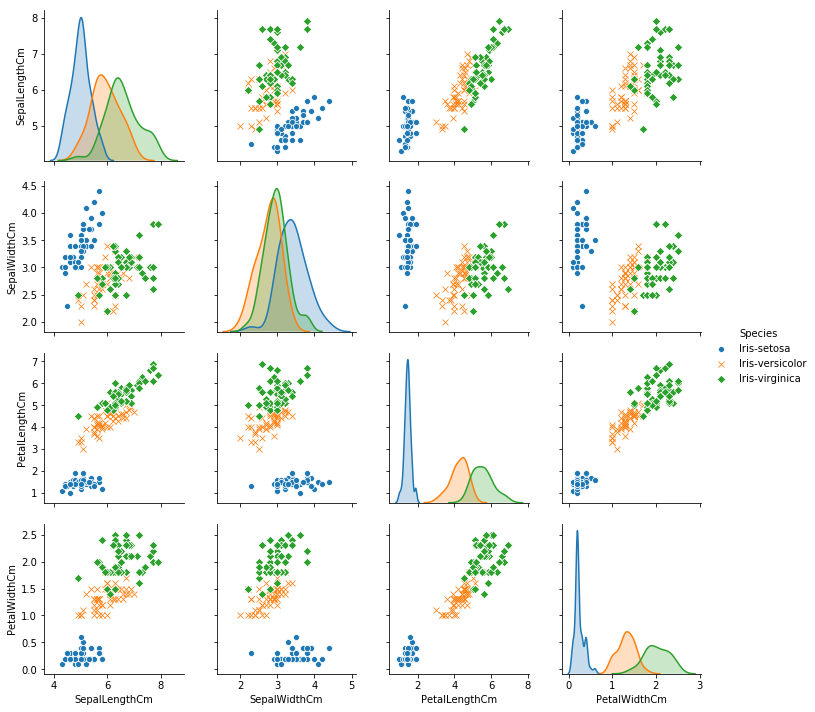

In [12]:
r = sb.pairplot(iris, hue='Species',markers=["o", "x", "D"])

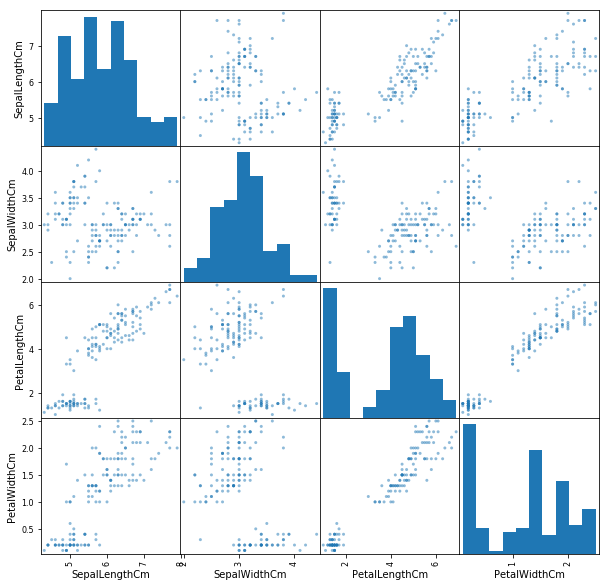

In [13]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
x=iris[feature_names]
y=iris['Species']
iris.replace({'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
cmap=cm.get_cmap('gnuplot')
scatter=scatter_matrix(x,alpha=0.5,figsize=(10,10))


In [14]:
#Conversion of Categorical data into numeric data

dict={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
iris.replace({'Species' :dict},inplace=True)

# Changing the species to 0,1,2 for Regression

In [15]:
iris['Species'].unique()

array([0, 1, 2], dtype=int64)

In [16]:
#Splitting the dataset into a training set and a training set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=27)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60, 4)
(60,)
(90, 4)
(90,)


# Standardization of values

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
#K - Nearest Neighbour (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier

model_KNN=KNeighborsClassifier().fit(x_train,y_train)
print('Accuracy of K - Nearest Neighbour Classifier is {:.2f}' .format(model_KNN.score(x_test,y_test)))


Accuracy of K - Nearest Neighbour Classifier is 0.97


In [20]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model_lr=LogisticRegression().fit(x_train,y_train)
print("Accuracy of Logistic Regression is {:.2f}" .format(model_lr.score(x_test,y_test)))


Accuracy of Logistic Regression is 0.92


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [25]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_lr=RandomForestClassifier().fit(x_train,y_train)
print("Accuracy of RaForestClassifier is {:.2f}" .format(model_lr.score(x_test,y_test)))

Accuracy of RaForestClassifier is 0.96


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
from sklearn.svm import SVC

model_lr=SVC().fit(x_train,y_train)
print("Accuracy of SVC is {:.2f}" .format(model_lr.score(x_test,y_test)))

Accuracy of SVC is 0.97


In [28]:
from sklearn.tree import DecisionTreeClassifier

model_lr=DecisionTreeClassifier().fit(x_train,y_train)
print("Accuracy of DecisionTreeClassifier is {:.2f}" .format(model_lr.score(x_test,y_test)))

Accuracy of DecisionTreeClassifier is 0.97


In [29]:
from sklearn.naive_bayes import GaussianNB

model_lr=GaussianNB().fit(x_train,y_train)
print("Accuracy of GaussianNB is {:.2f}" .format(model_lr.score(x_test,y_test)))

Accuracy of GaussianNB is 0.94
